# Welcome to your first data science task!

The goal of this data science project is to identify the most impactful days of the year 2021 from the prespective of social media and compare that to the key events reported by mainstream media. We also would like understand if these key event dates are the same worldwide or if they differ by country.

To answer these questions, we need to prepare our input data and extract the important features. This is what we call data pre-processing or ETL (Extract, Transform and Load). This is an important step in data analytics and it preceeds data analysis.

## Objective

As discussed in **Topic A**, there are many ways of doing ETL and it is dependent on the data and the use case. For this specific problem, we need to identify key event dates in the dataset which correspond to high twitter activity. We also need to make sure that the number of tweets can be compared between countries.


The final data table should have end goal of this task is to produce an input data table which will have dates column and tweets volumes for 2 different countries and worldwide. 

The final data table will look like this:

| Key dates     | worldwide | USA     | UK      |
|:--------------|:----------|:--------|:--------|
| 05/03/2021    | 3245333   | 764465  | 195334  |
| 21/04/2021    | 2878657   | 349900  | 110391  |
| 11/06/2021    | 8875246   | 110433  | 88845   |
| 02/09/2021    | 1533466   | 385323  | 208946  |
| 17/09/2021    | 3792222   | 554258  | 100043  |


The input data can be visualised in different ways. With a heat map, we can identify at a glance  the dates with the highest twitter activity and compare between the countries.

<img src="./images/heat_map_example.png" width="45%"/>


## Setup the environment

Let us start by setting up our analytics environement by calling the required packages for this task. 

We will need the following libraries:

* **pandas**: library for data manipulation. It will help us structure the data.
* **sklearn**: library of different analytics models. In this case we will use the linear regression model.
* **matplotlib.pyplot**: plotting library. We will use this to visualise data.
* **seaborn**: plotting library. We will use this to visualise data.

Run the following cell to import the packages:

In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
#sns.set()

## Reading the input data

We will start by reading the twitter data from an excel file. We will use the *pandas* library to generate a structure data table called a *dataframe*. 
To read the data we need the name of the data file and the location or path to where file is stored.
Run the next cell to read the data. We will call our dataframe twitter_counts.

In [34]:
twitter_counts = pd.read_excel('./input_data/test_data.xlsx', sheet_name='test_data',engine='openpyxl')

We can preview the dataframe and diplay some basic information using *pandas*. Some very useful *pandas* command to know are:\
**twitter_counts.shape**: Display number of rows and columns\
**twitter_counts.head(n)** Diplay first n rows of the DataFrame\
**twitter_counts.tail(n)** Diplay last n rows of the DataFrame\
**twitter_counts.info()** Display Index, Datatype and Memory information\
**twitter_counts.describe()** Provides summary statistics for numerical columns\
**twitter_counts.colums** : Display list of dataframe attributes

Have a go at testing these different commands in the cell below.

Using the *twitter_counts.head(n)*, preview the first 10 rows of the dataframe.

Using the *describe* command can you tell:

1. what is the maximum number of daily tweets worldwide?
2. what is the average number of daily tweet in the UK and how does it compare the average in the USA?

In [36]:
print('this is the number of rows and columns')
twitter_counts.shape
twitter_counts.describe()

this is the number of rows and columns


,worldwide,USA,UK
count,2.490000e+02,2.490000e+02,2.490000e+02
mean,8.924556e+07,1.350109e+07,4.273467e+06
std,7.914660e+07,1.643071e+07,5.389751e+06
min,1.706200e+05,1.246100e+04,5.611000e+03
25%,3.162673e+07,2.649798e+06,7.459370e+05
50%,6.720788e+07,8.218723e+06,2.420713e+06
75%,1.311332e+08,1.776193e+07,5.987959e+06
max,4.358242e+08,1.081138e+08,3.137563e+07


## Visualising the input data

We will use the **matplotlib** libray to visualise the data. Below is a code snippet of how you can create a visual. Have a go at changing visual's parameters such as title, labels, colour, date range.

1. Can you comment the line which plots the *worlwide* count? 
2. Can you visualise the data for between 1st of February and 31st of March 2021? Do you notice anything?

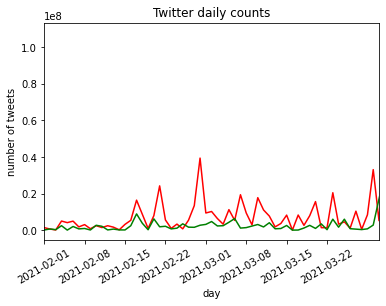

In [39]:
fig, ax = plt.subplots()
#ax.plot(twitter_counts['day'],twitter_counts['worldwide'],color='blue')
ax.plot(twitter_counts['day'],twitter_counts['USA'],color='red')
ax.plot(twitter_counts['day'],twitter_counts['UK'],color='green')
ax.set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
       xlim=[dt.date(2021, 2,1 ), dt.date(2021, 3, 31)])
plt.xticks(rotation=30)
plt.show()

## Scaling the data

We already know from the summary statistics that the average daily number of tweets in the USA is higher compared to the UK and this is also visible in the plot above.\
Does this mean that twitter usage is higher in the USA? Not necessarily. We cannot answer this question just from comparing the daily counts side by side as the current data do not account for population size. The USA population is significantly higher to that of the UK. To really answer the question of which country uses twitter more frequently we need to scale the data to the population size. In other words, we need to calulate the number of tweets by person or for a better scaling, we can calculate the number of tweets by 1 million people.

Let us add to the table new scaled attributes for both countries.

Go ahead and replace for each country the scaling factor **'1.'** by the corresponding population size in millions then run the code in the cell to generate the new attributes in the dataframe.

Remember that you can always use the pandas commands learned at the start to preview or run statistics on your new dataframe.

In [40]:
twitter_counts['USA_scaled']=np.floor(twitter_counts['USA']/10.)
twitter_counts['UK_scaled']=np.floor(twitter_counts['UK']/5.)
twitter_counts['worldwide_scaled']=np.floor(twitter_counts['worldwide']/50.)

If you scaled the data correctly you should see a difference when plotting the count and scaled_count together.
Run the plots below to check your scaling. You can always update the scaling value above.

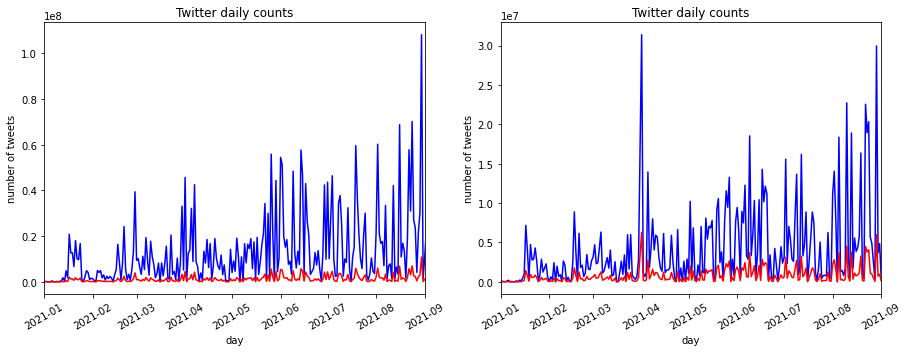

In [41]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA'],color='blue')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='red')
ax[0].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK'],color='blue')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='red')
ax[1].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

plt.show()

From now on we will be using the scaled_counts for the rest of the pre-processing

## Extracting key event dates

We can smooth the data using a rolling average. Go ahead and change the window size of the rolling average to smooth your data.

In [59]:
twitter_counts['worldwide_R_average'] = twitter_counts['worldwide_scaled'].rolling(window=7).median()
twitter_counts['USA_R_average'] = twitter_counts['USA_scaled'].rolling(window=7).median()
twitter_counts['UK_R_average'] = twitter_counts['UK_scaled'].rolling(window=7).median()

If you changed the window size for the rolling average you should see a difference between the count_scaled and the averaged count.

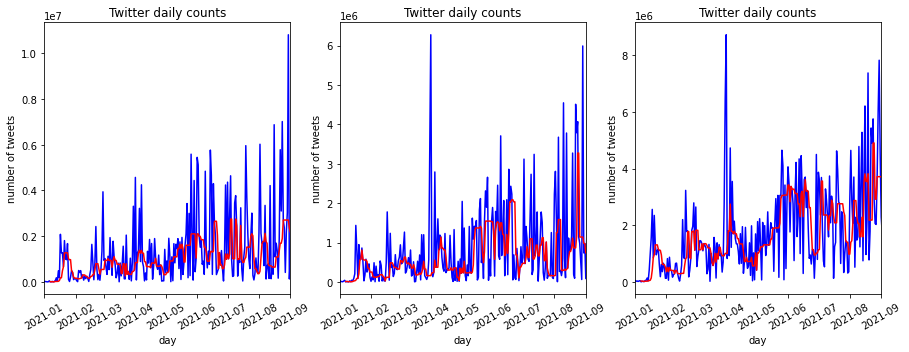

In [60]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_R_average'],color='red')
ax[0].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_R_average'],color='red')
ax[1].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_R_average'],color='red')
ax[2].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 

plt.show()

In [61]:
#twitter_counts['day'] = pd.to_datetime(twitter_counts['day'])
twitter_counts['day_ordinal']=twitter_counts['day'].map(dt.datetime.toordinal)

In [62]:
regression1=LinearRegression().fit(twitter_counts[twitter_counts['worldwide_R_average'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['worldwide_R_average'].notnull()]['worldwide_R_average'])

regression2=LinearRegression().fit(twitter_counts[twitter_counts['USA_R_average'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['USA_R_average'].notnull()]['USA_R_average'])

regression3=LinearRegression().fit(twitter_counts[twitter_counts['UK_R_average'].notnull()][['day_ordinal']],\
                                  twitter_counts[twitter_counts['UK_R_average'].notnull()]['UK_R_average'])
#regression.score(twitter_counts[['day']],twitter_counts['rolling_average'])

In [63]:
twitter_counts['worldwide_baseline'] = regression1.predict(twitter_counts[['day_ordinal']])
twitter_counts['USA_baseline'] = regression2.predict(twitter_counts[['day_ordinal']])
twitter_counts['UK_baseline'] = regression3.predict(twitter_counts[['day_ordinal']])

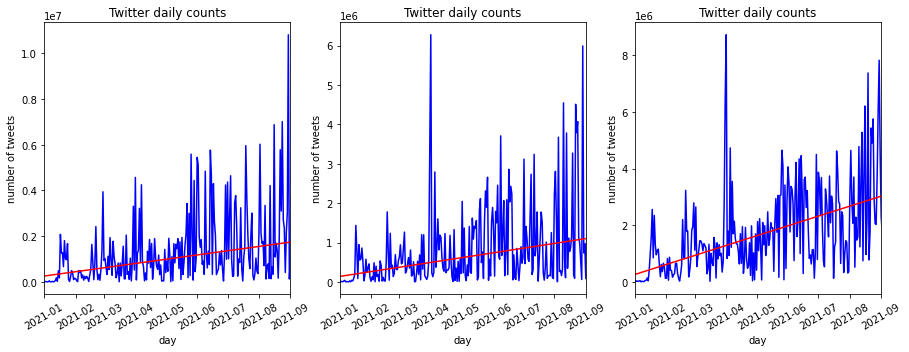

In [64]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_baseline'],color='red')
ax[0].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_baseline'],color='red')
ax[1].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_baseline'],color='red')
ax[2].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 

plt.show()

In [65]:
twitter_counts['worldwide_residuals']=twitter_counts['worldwide_scaled']-twitter_counts['worldwide_baseline']
twitter_counts['USA_residuals']=twitter_counts['USA_scaled']-twitter_counts['USA_baseline']
twitter_counts['UK_residuals']=twitter_counts['UK_scaled']-twitter_counts['UK_baseline']

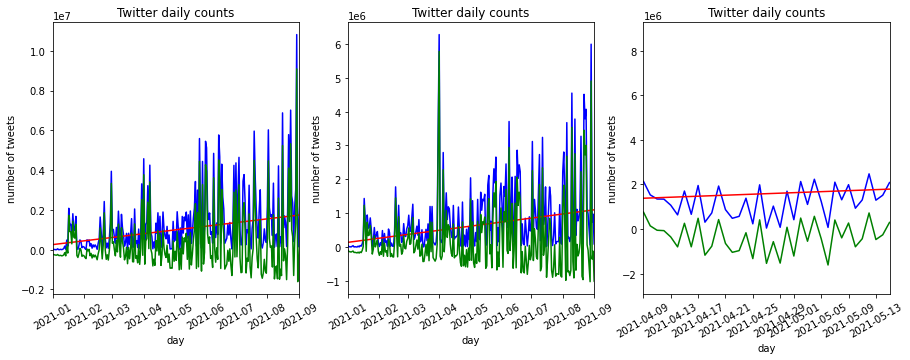

In [66]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_scaled'],color='blue')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_baseline'],color='red')
ax[0].plot(twitter_counts['day'],twitter_counts['USA_residuals'],color='green')
ax[0].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK_scaled'],color='blue')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_baseline'],color='red')
ax[1].plot(twitter_counts['day'],twitter_counts['UK_residuals'],color='green')
ax[1].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_scaled'],color='blue')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_baseline'],color='red')
ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_residuals'],color='green')
ax[2].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 4,9 ), dt.date(2021, 5, 15)])
ax[2].tick_params(axis='x', rotation=30) 

plt.show()

In [67]:
rms_worldwide=np.sqrt(np.mean(twitter_counts[(twitter_counts['day'] > dt.datetime(2021, 4,9 )) &\
                     (twitter_counts['day'] <= dt.datetime(2021, 5, 15))]['worldwide_residuals']**2))

rms_USA=np.sqrt(np.mean(twitter_counts[(twitter_counts['day'] > dt.datetime(2021, 4,9 )) &\
                     (twitter_counts['day'] <= dt.datetime(2021, 5, 15))]['USA_residuals']**2))

rms_UK=np.sqrt(np.mean(twitter_counts[(twitter_counts['day'] > dt.datetime(2021, 4,9 )) &\
                     (twitter_counts['day'] <= dt.datetime(2021, 5, 15))]['UK_residuals']**2))

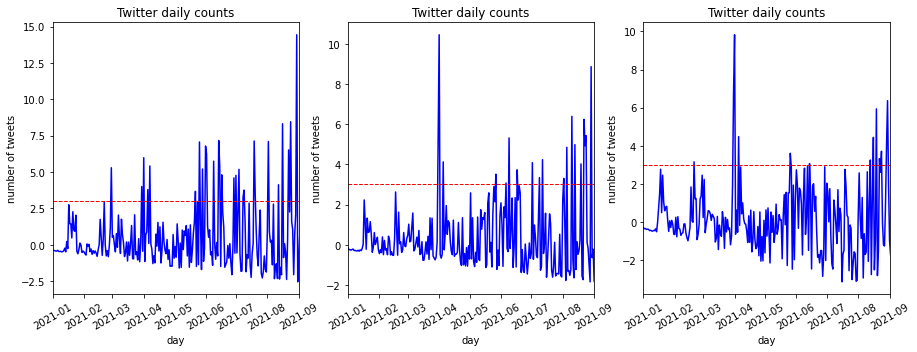

In [68]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_residuals']/rms_USA,color='blue')
ax[0].plot([dt.date(2021, 1,1 ), dt.date(2021, 9, 1)], [3, 3], color='red', linestyle='--', linewidth=1)
ax[0].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK_residuals']/rms_UK,color='blue')
ax[1].plot([dt.date(2021, 1,1 ), dt.date(2021, 9, 1)], [3, 3], color='red', linestyle='--', linewidth=1)
ax[1].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_residuals']/rms_worldwide,color='blue')
ax[2].plot([dt.date(2021, 1,1 ), dt.date(2021, 9, 1)], [3, 3], color='red', linestyle='--', linewidth=1)
ax[2].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 

plt.show()

In [69]:
twitter_counts['USA_events']=twitter_counts['USA_residuals'].copy()
twitter_counts['UK_events']=twitter_counts['worldwide_residuals'].copy()
twitter_counts['worldwide_events']=twitter_counts['worldwide_residuals'].copy()

twitter_counts.loc[twitter_counts['USA_residuals']/rms_USA < 3.,'USA_events']=0.
twitter_counts.loc[twitter_counts['UK_residuals']/rms_UK < 3.,'UK_events']=0.
twitter_counts.loc[twitter_counts['worldwide_residuals']/rms_worldwide < 3.,'worldwide_events']=0.

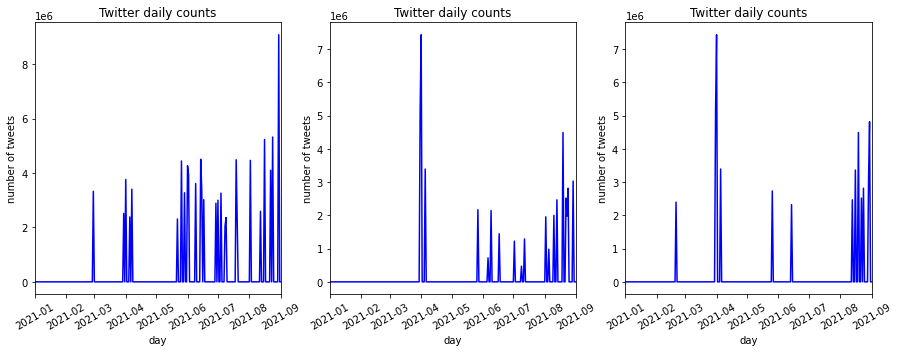

In [70]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(twitter_counts['day'],twitter_counts['USA_events'],color='blue')
ax[0].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[0].tick_params(axis='x', rotation=30) 

ax[1].plot(twitter_counts['day'],twitter_counts['UK_events'],color='blue')
ax[1].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[1].tick_params(axis='x', rotation=30) 

ax[2].plot(twitter_counts['day'],twitter_counts['worldwide_events'],color='blue')
ax[2].set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax[2].tick_params(axis='x', rotation=30) 

plt.show()

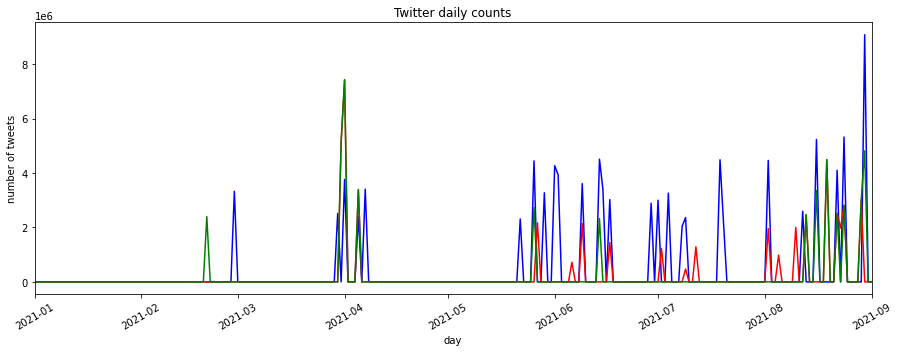

In [72]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(twitter_counts['day'],twitter_counts['USA_events'],color='blue')

ax.plot(twitter_counts['day'],twitter_counts['UK_events'],color='red')

ax.plot(twitter_counts['day'],twitter_counts['worldwide_events'],color='green')
ax.set(xlabel='day', ylabel='number of tweets',
       title='Twitter daily counts',\
          xlim=[dt.date(2021, 1,1 ), dt.date(2021, 9, 1)])
ax.tick_params(axis='x', rotation=30) 

plt.show()

In [73]:

processed_data=twitter_counts[['day','worldwide_events','USA_events','UK_events']]
processed_data=processed_data.loc[(processed_data[['worldwide_events','USA_events','UK_events']]!=0.).any(axis=1)].\
                                                                                            reset_index(drop=True)


processed_data.head(10)
processed_data.style.background_gradient(cmap='Blues')
#processed_data.style.bar(color='blue')

,day,worldwide_events,USA_events,UK_events
0,2021-02-20 00:00:00,2395522.148160,0.000000,0.000000
1,2021-02-28 00:00:00,0.000000,3330580.657522,0.000000
2,2021-03-30 00:00:00,0.000000,2515767.487943,0.000000
3,2021-03-31 00:00:00,5144721.709641,0.000000,5144721.709641
4,2021-04-01 00:00:00,7429007.877885,3765660.476638,7429007.877885
5,2021-04-05 00:00:00,3391570.550858,2386534.454027,3391570.550858
6,2021-04-07 00:00:00,0.000000,3406821.442721,0.000000
7,2021-05-22 00:00:00,0.000000,2310263.188353,0.000000
8,2021-05-26 00:00:00,2733044.131257,4445519.165742,0.000000
9,2021-05-27 00:00:00,0.000000,0.000000,2168840.299500


correcting for population size based on census date
correcting for age distribution bias